In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv(r'C:\Users\rathi\course8-Renaissa\quantum_devices_ml_dataset.csv')
data

,journal_topic,device_type,material_system,application_area,temperature_K,bias_voltage_V,quantum_well_width_nm,bandgap_eV,effective_mass_me,barrier_height_eV,photon_wavelength_nm,photon_energy_eV,is_infrared,spin_polarization,quantum_efficiency,performance_metric,meets_spec,device_complexity_index
0,k·p Perturbation Theory,Quantum Well Laser,ZnSe-based,Non-Volatile Memory,324.07,3.790,2.096,2.894,0.338,0.338,408.0,3.039,0,0.238,0.450,28.940,1,0.656
1,Schrodinger Cat Paradox,QD-Based LCD Pixel,GaAs/AlGaAs,Non-Volatile Memory,281.88,3.980,2.973,1.534,0.295,0.374,738.4,1.679,1,-0.081,0.637,29.353,1,0.330
2,Photoelectric Effect,Spintronic MRAM Cell,GaAs/AlGaAs,Infrared Sensing,278.66,4.292,1.152,1.371,0.409,0.245,984.5,1.260,1,0.670,0.576,27.754,1,0.488
3,k·p Perturbation Theory,Quantum Cascade Laser,InGaAs/InP,Non-Volatile Memory,311.49,4.778,2.896,0.812,0.238,0.256,1523.6,0.814,1,-0.156,0.757,36.762,1,0.259
4,Quantum Cascade Laser,Quantum Cascade Laser,CdSe/CdS QDs,Infrared Sensing,324.71,2.134,4.042,1.765,0.399,0.354,797.7,1.554,1,-0.198,0.316,5.918,0,0.462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,Quantum Cascade Laser,Quantum Cascade Laser,MoS2,Non-Volatile Memory,292.64,1.982,3.652,2.294,0.277,0.313,540.5,2.294,0,0.068,0.381,7.902,0,0.388
746,Quantum Cascade Laser,Spintronic MRAM Cell,CdSe/CdS QDs,Infrared Sensing,288.60,3.531,0.911,1.813,0.153,0.209,659.3,1.881,0,0.733,0.640,33.127,1,0.501
747,Colloidal Quantum Dots,Avalanche Photodiode,GaAs/AlGaAs,Visible LEDs,310.94,3.114,4.895,1.346,0.200,0.378,903.8,1.372,1,-0.115,0.506,13.827,0,0.450
748,Quantum Cascade Laser,Avalanche Photodiode,GaAs/AlGaAs,Visible LEDs,315.27,3.184,3.787,1.285,0.261,0.155,1005.2,1.234,1,-0.129,0.665,20.706,1,0.459


In [17]:
data.columns

Index(['journal_topic', 'device_type', 'material_system', 'application_area',
       'temperature_K', 'bias_voltage_V', 'quantum_well_width_nm',
       'bandgap_eV', 'effective_mass_me', 'barrier_height_eV',
       'photon_wavelength_nm', 'photon_energy_eV', 'is_infrared',
       'spin_polarization', 'quantum_efficiency', 'performance_metric',
       'meets_spec', 'device_complexity_index'],
      dtype='object')

In [19]:
data.dtypes

journal_topic               object
device_type                 object
material_system             object
application_area            object
temperature_K              float64
bias_voltage_V             float64
quantum_well_width_nm      float64
bandgap_eV                 float64
effective_mass_me          float64
barrier_height_eV          float64
photon_wavelength_nm       float64
photon_energy_eV           float64
is_infrared                  int64
spin_polarization          float64
quantum_efficiency         float64
performance_metric         float64
meets_spec                   int64
device_complexity_index    float64
dtype: object

In [21]:
for i in data.columns:
    print(data[i].unique())

['k·p Perturbation Theory' 'Schrodinger Cat Paradox'
 'Photoelectric Effect' 'Quantum Cascade Laser' 'Colloidal Quantum Dots'
 'Single Quantum Well' 'Spintronics Devices']
['Quantum Well Laser' 'QD-Based LCD Pixel' 'Spintronic MRAM Cell'
 'Quantum Cascade Laser' '2D-TMD FET' 'Avalanche Photodiode']
['ZnSe-based' 'GaAs/AlGaAs' 'InGaAs/InP' 'CdSe/CdS QDs' 'WSe2' 'MoS2'
 'GaN/AlGaN']
['Non-Volatile Memory' 'Infrared Sensing' 'Display Technology'
 'Optical Communication' 'Terahertz Emission' 'Visible LEDs']
[324.07 281.88 278.66 311.49 324.71 301.01 267.84 265.99 264.32 255.81
 302.74 328.13 299.66 243.49 295.23 295.93 352.4  263.57 290.23 342.65
 311.25 314.08 302.86 308.25 319.44 279.76 321.95 265.67 308.21 304.47
 284.59 299.43 284.44 273.21 291.16 272.4  308.07 271.25 317.8  270.46
 285.84 284.38 333.13 308.26 294.71 312.47 247.32 298.92 349.94 303.31
 301.7  313.7  322.39 250.06 257.94 305.26 282.13 332.8  292.12 251.64
 268.3  231.26 294.15 295.29 289.39 326.97 329.96 295.74 246.63 3

In [23]:
# Create a copy of the numeric data to avoid modifying the original
no_outlier = data.copy()

def outlier_cleanup(col):
    # Calculate IQR and outlier fences
    q1 = no_outlier[col].quantile(0.25)
    q3 = no_outlier[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)  # lower fence
    uf = q3 + (1.5 * iqr)  # upper fence

    # Check column type for proper handling of integer and float types
    col_type = str(no_outlier[col].dtype)

    # Apply outlier treatment
    if col_type in ["int64", "int32", "int16", "int8"]:
        # For integer columns, round the fence values and cast them to integers
        no_outlier.loc[no_outlier[col] < lf, col] = int(round(lf))
        no_outlier.loc[no_outlier[col] > uf, col] = int(round(uf))
    else:
        # For float columns, directly assign the fence values
        no_outlier.loc[no_outlier[col] < lf, col] = lf
        no_outlier.loc[no_outlier[col] > uf, col] = uf

# Apply outlier cleanup to specific columns
my_conti_cols = ['temperature_K', 'bias_voltage_V', 'quantum_well_width_nm', 'bandgap_eV', 'effective_mass_me', 'barrier_height_eV',
       'photon_wavelength_nm', 'photon_energy_eV', 'spin_polarization', 'quantum_efficiency', 'performance_metric', 'device_complexity_index']
for col in my_conti_cols:
    outlier_cleanup(col)

no_outlier

,journal_topic,device_type,material_system,application_area,temperature_K,bias_voltage_V,quantum_well_width_nm,bandgap_eV,effective_mass_me,barrier_height_eV,photon_wavelength_nm,photon_energy_eV,is_infrared,spin_polarization,quantum_efficiency,performance_metric,meets_spec,device_complexity_index
0,k·p Perturbation Theory,Quantum Well Laser,ZnSe-based,Non-Volatile Memory,324.07,3.790,2.096,2.894,0.338,0.338,408.0000,3.039,0,0.238,0.450,28.940,1,0.656
1,Schrodinger Cat Paradox,QD-Based LCD Pixel,GaAs/AlGaAs,Non-Volatile Memory,281.88,3.980,2.973,1.534,0.295,0.374,738.4000,1.679,1,-0.081,0.637,29.353,1,0.330
2,Photoelectric Effect,Spintronic MRAM Cell,GaAs/AlGaAs,Infrared Sensing,278.66,4.292,1.152,1.371,0.409,0.245,984.5000,1.260,1,0.670,0.576,27.754,1,0.488
3,k·p Perturbation Theory,Quantum Cascade Laser,InGaAs/InP,Non-Volatile Memory,311.49,4.778,2.896,0.812,0.238,0.256,1499.0625,0.814,1,-0.156,0.757,36.762,1,0.259
4,Quantum Cascade Laser,Quantum Cascade Laser,CdSe/CdS QDs,Infrared Sensing,324.71,2.134,4.042,1.765,0.399,0.354,797.7000,1.554,1,-0.198,0.316,5.918,0,0.462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,Quantum Cascade Laser,Quantum Cascade Laser,MoS2,Non-Volatile Memory,292.64,1.982,3.652,2.294,0.277,0.313,540.5000,2.294,0,0.068,0.381,7.902,0,0.388
746,Quantum Cascade Laser,Spintronic MRAM Cell,CdSe/CdS QDs,Infrared Sensing,288.60,3.531,0.911,1.813,0.153,0.209,659.3000,1.881,0,0.733,0.640,33.127,1,0.501
747,Colloidal Quantum Dots,Avalanche Photodiode,GaAs/AlGaAs,Visible LEDs,310.94,3.114,4.895,1.346,0.200,0.378,903.8000,1.372,1,-0.115,0.506,13.827,0,0.450
748,Quantum Cascade Laser,Avalanche Photodiode,GaAs/AlGaAs,Visible LEDs,315.27,3.184,3.787,1.285,0.261,0.155,1005.2000,1.234,1,-0.129,0.665,20.706,1,0.459


In [25]:
# Label Encoding in categorical columns
from sklearn import preprocessing

categ = data.select_dtypes(exclude="number")

for i in categ.columns:
    encoder = preprocessing.LabelEncoder()  # Encoder is the object of 'LabelEncoder'.
    no_outlier[i] = encoder.fit_transform(no_outlier[i])

no_outlier

,journal_topic,device_type,material_system,application_area,temperature_K,bias_voltage_V,quantum_well_width_nm,bandgap_eV,effective_mass_me,barrier_height_eV,photon_wavelength_nm,photon_energy_eV,is_infrared,spin_polarization,quantum_efficiency,performance_metric,meets_spec,device_complexity_index
0,6,4,6,2,324.07,3.790,2.096,2.894,0.338,0.338,408.0000,3.039,0,0.238,0.450,28.940,1,0.656
1,3,2,1,2,281.88,3.980,2.973,1.534,0.295,0.374,738.4000,1.679,1,-0.081,0.637,29.353,1,0.330
2,1,5,1,1,278.66,4.292,1.152,1.371,0.409,0.245,984.5000,1.260,1,0.670,0.576,27.754,1,0.488
3,6,3,3,2,311.49,4.778,2.896,0.812,0.238,0.256,1499.0625,0.814,1,-0.156,0.757,36.762,1,0.259
4,2,3,0,1,324.71,2.134,4.042,1.765,0.399,0.354,797.7000,1.554,1,-0.198,0.316,5.918,0,0.462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,3,4,2,292.64,1.982,3.652,2.294,0.277,0.313,540.5000,2.294,0,0.068,0.381,7.902,0,0.388
746,2,5,0,1,288.60,3.531,0.911,1.813,0.153,0.209,659.3000,1.881,0,0.733,0.640,33.127,1,0.501
747,0,1,1,5,310.94,3.114,4.895,1.346,0.200,0.378,903.8000,1.372,1,-0.115,0.506,13.827,0,0.450
748,2,1,1,5,315.27,3.184,3.787,1.285,0.261,0.155,1005.2000,1.234,1,-0.129,0.665,20.706,1,0.459


In [27]:
from sklearn.preprocessing import MinMaxScaler

def my_scaling(col):
    my_scaling_obj = MinMaxScaler()
    no_outlier[col] = pd.DataFrame(my_scaling_obj.fit_transform(no_outlier[col].to_numpy().reshape(-1,1)))
    return no_outlier[col]
my_numerical_cols = ['temperature_K', 'bias_voltage_V', 'quantum_well_width_nm', 'bandgap_eV', 'effective_mass_me', 'barrier_height_eV',
       'photon_wavelength_nm', 'photon_energy_eV', 'spin_polarization', 'quantum_efficiency', 'performance_metric', 'device_complexity_index']
for i in my_numerical_cols:
    no_outlier[i] = my_scaling(i)
no_outlier

,journal_topic,device_type,material_system,application_area,temperature_K,bias_voltage_V,quantum_well_width_nm,bandgap_eV,effective_mass_me,barrier_height_eV,photon_wavelength_nm,photon_energy_eV,is_infrared,spin_polarization,quantum_efficiency,performance_metric,meets_spec,device_complexity_index
0,6,4,6,2,0.705225,0.627167,0.198310,0.796713,0.571429,0.544552,0.090070,0.711823,0,0.616164,0.450000,0.630498,1,0.733597
1,3,2,1,2,0.384096,0.660107,0.307281,0.340490,0.486111,0.612621,0.365619,0.329787,1,0.385193,0.725000,0.639495,1,0.364819
2,1,5,1,1,0.359587,0.714199,0.081014,0.285810,0.712302,0.368707,0.570863,0.212086,1,0.928953,0.635294,0.604659,1,0.543552
3,6,3,3,2,0.609473,0.798457,0.297714,0.098289,0.373016,0.389506,1.000000,0.086801,1,0.330890,0.901471,0.800911,1,0.284502
4,2,3,0,1,0.710097,0.340066,0.440109,0.417981,0.692460,0.574805,0.415074,0.294673,1,0.300480,0.252941,0.128932,0,0.514140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,3,4,2,0.465996,0.313714,0.391650,0.595438,0.450397,0.497282,0.200573,0.502546,0,0.493076,0.348529,0.172156,0,0.430430
746,2,5,0,1,0.435245,0.582264,0.051069,0.434083,0.204365,0.300638,0.299651,0.386530,0,0.974568,0.729412,0.721717,1,0.558258
747,0,1,1,5,0.605286,0.509969,0.546098,0.277424,0.297619,0.620184,0.503560,0.243548,1,0.360576,0.532353,0.301240,0,0.500566
748,2,1,1,5,0.638244,0.522105,0.408424,0.256961,0.418651,0.198535,0.588126,0.204782,1,0.350439,0.766176,0.451109,1,0.510747


# Multiple Linear Regression

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # y = m1*x1 + m2*x2 + m3*x3 + m4*x4 + m5*x5 + c + e (Multiple Linear Regression)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
my_corr = no_outlier.corr()[['bandgap_eV']].sort_values(by='bandgap_eV', ascending=False)
my_corr

,bandgap_eV
bandgap_eV,1.000000
photon_energy_eV,0.964460
device_complexity_index,0.559002
material_system,0.179297
performance_metric,0.115765
spin_polarization,0.043152
device_type,0.034211
bias_voltage_V,0.021073
journal_topic,-0.000791
quantum_well_width_nm,-0.014377


In [42]:
# Check multi-colinearity between independent variables using the VIF score.

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
no_bandgap = no_outlier.drop("bandgap_eV", axis=1)
no_bandgap

,journal_topic,device_type,material_system,application_area,temperature_K,bias_voltage_V,quantum_well_width_nm,effective_mass_me,barrier_height_eV,photon_wavelength_nm,photon_energy_eV,is_infrared,spin_polarization,quantum_efficiency,performance_metric,meets_spec,device_complexity_index
0,6,4,6,2,0.705225,0.627167,0.198310,0.571429,0.544552,0.090070,0.711823,0,0.616164,0.450000,0.630498,1,0.733597
1,3,2,1,2,0.384096,0.660107,0.307281,0.486111,0.612621,0.365619,0.329787,1,0.385193,0.725000,0.639495,1,0.364819
2,1,5,1,1,0.359587,0.714199,0.081014,0.712302,0.368707,0.570863,0.212086,1,0.928953,0.635294,0.604659,1,0.543552
3,6,3,3,2,0.609473,0.798457,0.297714,0.373016,0.389506,1.000000,0.086801,1,0.330890,0.901471,0.800911,1,0.284502
4,2,3,0,1,0.710097,0.340066,0.440109,0.692460,0.574805,0.415074,0.294673,1,0.300480,0.252941,0.128932,0,0.514140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,3,4,2,0.465996,0.313714,0.391650,0.450397,0.497282,0.200573,0.502546,0,0.493076,0.348529,0.172156,0,0.430430
746,2,5,0,1,0.435245,0.582264,0.051069,0.204365,0.300638,0.299651,0.386530,0,0.974568,0.729412,0.721717,1,0.558258
747,0,1,1,5,0.605286,0.509969,0.546098,0.297619,0.620184,0.503560,0.243548,1,0.360576,0.532353,0.301240,0,0.500566
748,2,1,1,5,0.638244,0.522105,0.408424,0.418651,0.198535,0.588126,0.204782,1,0.350439,0.766176,0.451109,1,0.510747


In [116]:
no_of_cols = no_bandgap.shape[1]
no_of_cols

17

In [118]:
def myVIF(x):
    vif = pd.Series(name="vif")
    for i in range(0, no_of_cols):
        vif[x.columns[i]] = variance_inflation_factor(x.values, i)
    return vif

vif_values = myVIF(no_bandgap)
print(vif_values)

journal_topic               3.162324
device_type                 4.707835
material_system             3.431304
application_area            3.279642
temperature_K               7.940854
bias_voltage_V             34.775185
quantum_well_width_nm       6.886139
effective_mass_me           6.828453
barrier_height_eV           7.407983
photon_wavelength_nm       10.684125
photon_energy_eV           16.974048
is_infrared                 6.319725
spin_polarization          12.704556
quantum_efficiency         30.158040
performance_metric         40.164698
meets_spec                  4.051850
device_complexity_index    24.291371
Name: vif, dtype: float64


In [112]:
# We should take the columns in which VIF scores are less than 20.
# photon_energy_eV', 'material_system', 'is_infrared', and 'photon_wavelength_nm' (based on correlation with the target column and VIF score).

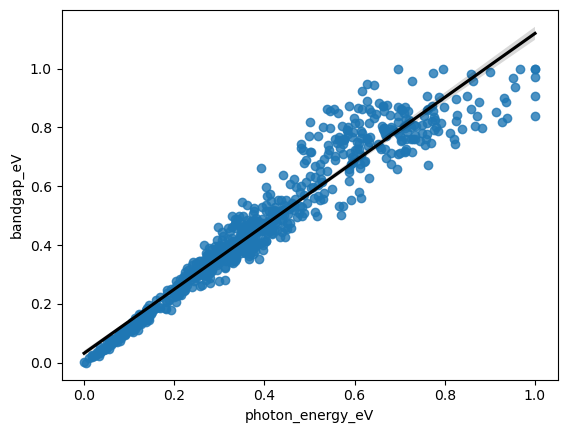

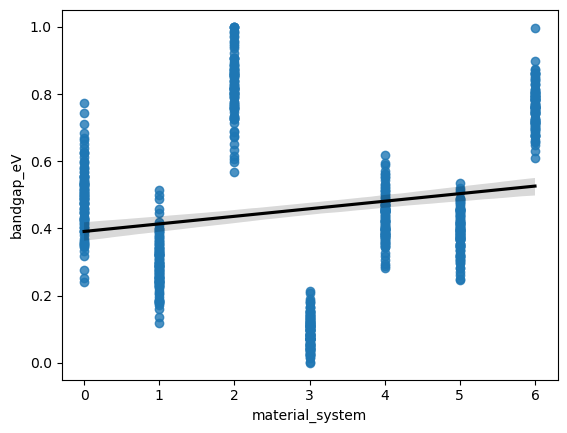

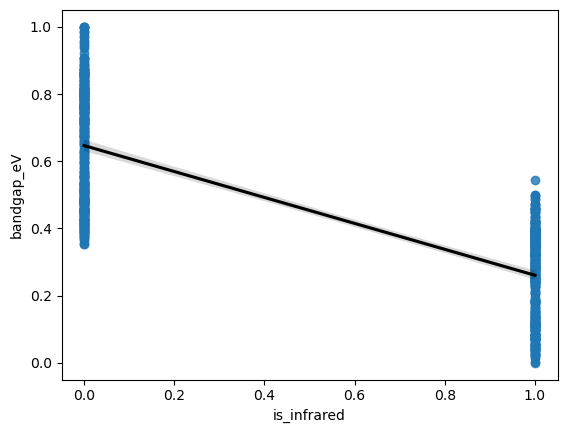

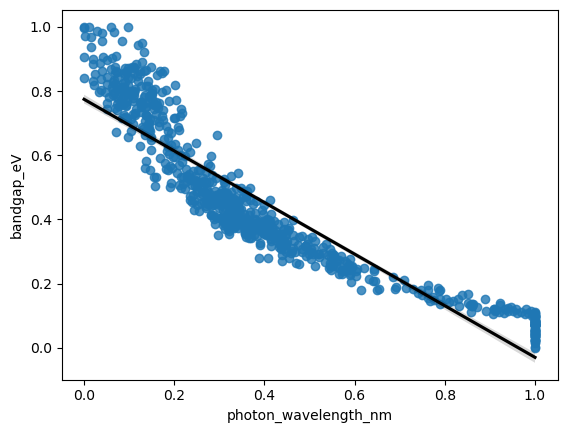

In [68]:
my_cols = ['photon_energy_eV', 'material_system', 'is_infrared', 'photon_wavelength_nm']
for i in my_cols:
    sns.regplot(x=i, y="bandgap_eV", data=no_outlier, line_kws={"color":"black"})
    plt.show()

In [162]:
x_new = no_outlier[['photon_energy_eV', 'material_system', 'is_infrared', 'photon_wavelength_nm']].to_numpy().reshape(-1,4)
x_new

array([[0.71182275, 6.        , 0.        , 0.09007037],
       [0.32978686, 1.        , 1.        , 0.36561897],
       [0.2120861 , 1.        , 1.        , 0.57086265],
       ...,
       [0.24354788, 1.        , 1.        , 0.50356007],
       [0.20478247, 1.        , 1.        , 0.58812614],
       [0.08062081, 3.        , 1.        , 1.        ]])

In [164]:
y_new = no_outlier["bandgap_eV"].to_numpy().reshape(-1, 1)
y_new

array([[0.79671251],
       [0.34048977],
       [0.28581013],
       [0.09828916],
       [0.41798054],
       [0.23783965],
       [0.4478363 ],
       [0.79503522],
       [0.42670245],
       [0.52499161],
       [0.09661188],
       [0.34216706],
       [0.4924522 ],
       [0.1402214 ],
       [0.28882925],
       [0.48909762],
       [0.78061053],
       [0.89600805],
       [0.78396511],
       [0.78161691],
       [0.34686347],
       [0.56725931],
       [0.48641396],
       [0.27037907],
       [0.50385777],
       [0.78731969],
       [0.06977524],
       [0.98758806],
       [0.76450855],
       [0.36430728],
       [0.67259309],
       [0.75612211],
       [0.28144918],
       [0.33780611],
       [0.61757799],
       [0.79537068],
       [0.18383093],
       [0.92284468],
       [0.42368333],
       [0.62764173],
       [0.74639383],
       [0.25327071],
       [0.81449178],
       [0.81616907],
       [0.2804428 ],
       [0.44682992],
       [0.47668568],
       [0.344

In [76]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, train_size = 0.7, random_state = 0)

In [78]:
# 'multi' is the name of the trained model.

In [80]:
model = LinearRegression()  # Step 1: Build a model using an algorithm.
multi = model.fit(x_new_train, y_new_train)  # Step 2: Fit the model. # Here, we are building the model and training it in the same line.

In [82]:
# Step 3: Check training performance of the model.
r_square = multi.score(x_new_train, y_new_train)
print("R-square:", r_square)  # Training model performance is 83.7%, which is good. A bad model will not give good results.

R-square: 0.9417792735099223


In [84]:
# Step 4: Predict through unseen data using predict().
y_new_pred = multi.predict(x_new_test)  # We are predicting the values of y_test and storing it as 'y_prediction'. The input is given by passing the input as x_test -> if not matching, it is an error or residual (for numerical columns).
y_new_pred  # This is predicting and comparing with 'y_new_test' values.

array([[0.70492964],
       [0.47734356],
       [0.75068532],
       [0.64920861],
       [0.57822066],
       [0.78404588],
       [0.38890441],
       [0.26923269],
       [0.27864243],
       [0.30479383],
       [0.94690153],
       [0.07089709],
       [0.92748429],
       [0.64586086],
       [0.35710181],
       [0.08382584],
       [0.39159201],
       [0.41545665],
       [0.38888825],
       [0.25303145],
       [0.53444031],
       [0.06454613],
       [0.13021483],
       [0.69040151],
       [0.39598551],
       [0.68682214],
       [0.46313603],
       [0.20616383],
       [0.34154011],
       [0.41401564],
       [0.70136643],
       [0.09143866],
       [0.06159747],
       [0.45642303],
       [0.21760534],
       [0.36627144],
       [0.47601491],
       [0.62806402],
       [0.52230326],
       [0.46689246],
       [0.41483167],
       [0.04004957],
       [0.33679691],
       [0.51711145],
       [0.68236187],
       [0.39480359],
       [0.22665077],
       [0.460

In [86]:
mse = mean_squared_error(y_new_test, y_new_pred)
print("MSE:", mse)  # Smaller errors are better. Example: 2 is better than 2000 errors in case of MSE. MSE is numerical, not %, all errors are %.

MSE: 0.003913068916393984


In [88]:
# Step 5: Check testing (r_square) performance of the model. -> Checks the reliability of the model.
r2_new = r2_score(y_new_test, y_new_pred)
print("New R-squared:", r2_new)  # The model performance is 80.6%, which is very good.

New R-squared: 0.9340178751936244


In [90]:
# Linear regression works better when there is more than one input column.

In [94]:
multi.intercept_  # The linear regression model gives the intercept value.

array([0.21959407])

In [96]:
multi.coef_  # Since we have taken 4 independent variables, we get 4 slopes for each line of best fit.

array([[ 0.80745095,  0.00258084, -0.02283235, -0.19371444]])

In [98]:
# Create a table containing residuals.
df_residual = pd.DataFrame()  # Creating an empty DataFrame
df_residual["y_pred"] = pd.DataFrame(y_new_pred)  # 'y_pred' - Creating a new column
# Assigning all 'y_new_pred' values to a 'y_pred' column in a DataFrame

In [100]:
df_residual["y_actual"] = pd.DataFrame(y_new_test)

In [102]:
# Residual = |Predicted - Actual|
df_residual["Residual"] = abs(df_residual["y_pred"] - df_residual["y_actual"])  # Error is calculated for each row.
df_residual  # Table with actual, predicted, and residual values

,y_pred,y_actual,Residual
0,0.704930,0.763167,0.058237
1,0.477344,0.475679,0.001664
2,0.750685,0.786313,0.035628
3,0.649209,0.756122,0.106913
4,0.578221,0.531030,0.047191
...,...,...,...
220,0.202620,0.222073,0.019453
221,0.901870,0.907078,0.005209
222,0.400118,0.395505,0.004613
223,0.807765,0.758806,0.048959


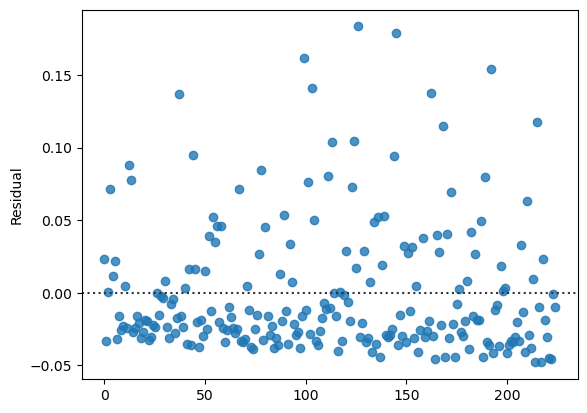

In [104]:
# Check if the assumption 'Homascedasticity' is applicable for this model.
sns.residplot(x = df_residual.index, y = "Residual", data = df_residual);

In [106]:
# According to the 'Residual' visual, homoscedasticity is followed.

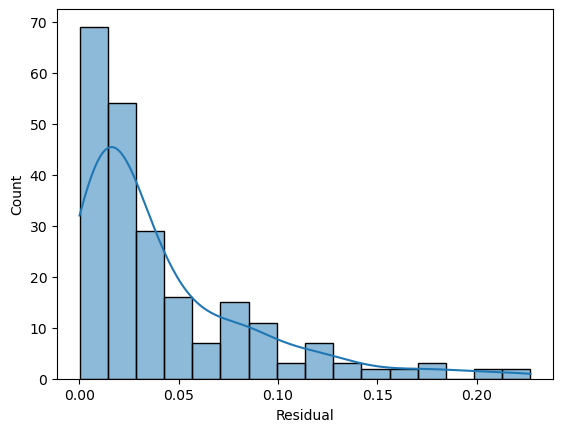

In [108]:
# Assumption normality of residuals
sns.histplot(df_residual["Residual"], kde=True);

In [110]:
# This assumption fails because errors are not normally distributed.

# Logistic Regression

In [123]:
len(no_outlier)

750

In [125]:
# Target column = 'bandgap_eV' is to be predicted. So, it will be considered as a dependent column.
# All other columns except for the column 'bandgap_eV' will be independent.

In [127]:
# We split the table into 4 parts that are called:
# x_train (training independent)
# x_test (testing independent)
# y_train (training dependent)
# y_test (testing dependent)

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve

In [135]:
# Features:
# 1. quantum_efficiency - best predictor because efficiency directly affects the device’s output power and photocurrent.
#                         Higher quantum efficiency leads to better performance, making it more likely to meet specifications.
# 2. bias_voltage_V - Performance is greatly influenced by the applied bias:
#                     A higher voltage boosts carrier injection, which enhances emission, absorption, gain, or photocurrent and increases the chances 
#                     that the device surpasses the threshold.
# 3. spin_polarization - In spintronic and some laser structures, polarization affects recombination rates and efficiency. In your dataset, it 
#                        positively influences performance. Including it enhances predictive power due to its correlation with improved performance.
# 4. bandgap_eV - It regulates photon energy, internal quantum efficiency, device electrical behavior, and thermal sensitivity.
#                 Devices with mismatched bandgap and wavelength relations often fail to meet specifications.
# 5. photon_wavelength_nm - The performance threshold varies for infrared and non-infrared devices. Using photon wavelength helps the logistic model understand:
#                           IR devices require only about a 20 threshold, and visible devices need around a 25 threshold.
#                           This aids the model in distinguishing between the two operating regimes.

Accuracy : 0.9066666666666666
F1 Score : 0.8551724137931035
ROC-AUC  : 0.9819663603259927

Confusion Matrix:
 [[142   4]
 [ 17  62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       146
           1       0.94      0.78      0.86        79

    accuracy                           0.91       225
   macro avg       0.92      0.88      0.89       225
weighted avg       0.91      0.91      0.90       225



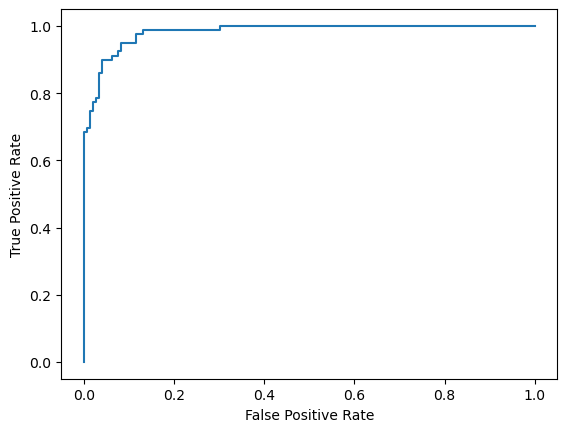

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.982


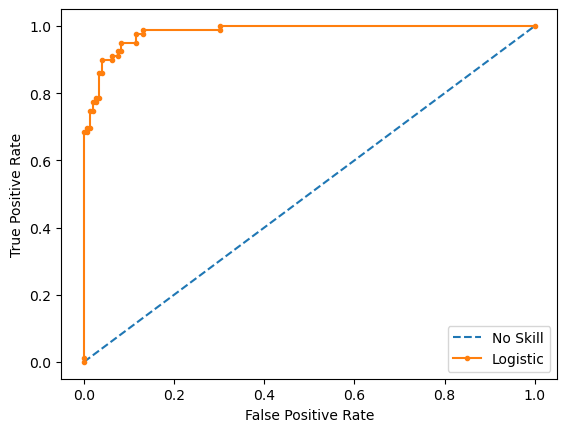

In [144]:
# Logistic Regression
# 1. Feature set
features = ["quantum_efficiency", "bias_voltage_V", "spin_polarization", "bandgap_eV", "photon_wavelength_nm"]
x = no_outlier[features]
y = no_outlier['meets_spec']  # clean, binary, and well linked to the physical parameters

# 2. Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

# 3. Build and fit Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# 4. Predict on test set
y_pred = logreg.predict(x_test)
y_prob = logreg.predict_proba(x_test)

# 5. Evaluation metrics
print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1]))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob[:,1], pos_label = 1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

lr_probs = logreg.predict_proba(x_test)
ns_probs = [0 for _ in range(len(y_test))]  # We are using list comprehension.

# 6. ROC curve
lr_probs = lr_probs[:, 1]
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# Add axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show the legend
plt.legend()
# Show the plot
plt.show()

# K-Nearest Neighbors

In [138]:
# Features:
# 1. quantum_efficiency - Devices with greater internal quantum efficiency typically meet specifications.
# 2. bias_voltage_V - KNN gains from this since voltage has a direct relationship with device output.
#                     Higher bias leads to higher injection and improved performance.
# 3. spin_polarization - For KNN, Spintronic devices receive a performance enhancement, and others do not. 
#                        This results in a beneficial clustering structure for KNN.
# 4. bandgap_eV - It influences photon energy matching, recombination rate, gain/absorption efficiency, and thermal sensitivity.
#                 It is very informative for pass/fail classification.
# 5. photon_wavelength_nm - Since infrared devices have a lower performance threshold, wavelength assists KNN in differentiating the two clusters.
#                           This feature allows KNN to accurately categorize "IR devices that pass" vs. "visible devices that fail".

750
27
0.9047619047619048
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1
 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1
 1 0 0]
[0 1]
27
23
[0.8977777777777778, 0.9111111111111111, 0.8933333333333333, 0.9111111111111111, 0.9111111111111111, 0.9155555555555556, 0.9111111111111111, 0.9022222222222223, 0.8977777777777778, 0.8933333333333333, 0.8977777777777778, 0.8933333333333333, 0.8933333333333333, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8977777777777778, 0.8933333333333333, 0.8888888888888888, 0.8844444444444445, 0.8844444444444445, 0.88, 0.8844444444444445, 0.88, 0.8711111111111111, 0.875555555

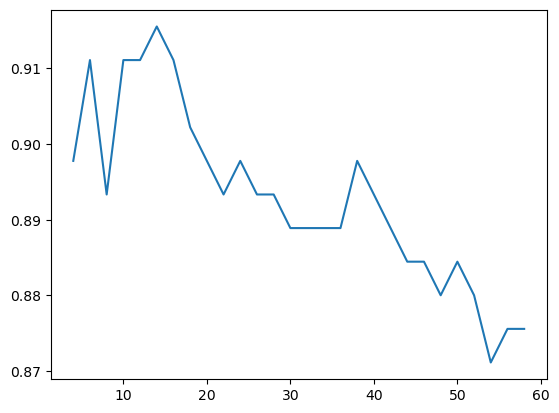

In [142]:
# Split again from the full processed data

# y: target variable is 'meets_spec'
y = no_outlier["meets_spec"]

# Drop target and irrelevant columns from features
x = no_outlier[["quantum_efficiency", "bias_voltage_V", "spin_polarization", "bandgap_eV", "photon_wavelength_nm"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)

n = len(no_outlier)  # number of elements (rows) in a dataset without any outliers (input variable)
print(n)
# Assume the value 'k' as the square root of the number of elements (rows) in an array
k = int(round(n)**0.5)
print(k)  # This is NOT the best value of 'k'.

from sklearn.neighbors import KNeighborsClassifier
my_knn = KNeighborsClassifier(27)  # k-value needs to be selected by the user (k = 27).
my_model_1 = my_knn.fit(x_train, y_train)  # Train the model.
print(my_model_1.score(x_train, y_train))

y_pred = my_model_1.predict(x_test)
print(y_pred)

my_model_1.classes_  # The class refers to unique values of the target column in a classification problem.
print(my_model_1.classes_)

my_model_1.n_neighbors
print(my_model_1.n_neighbors)

k2 = int(round(len(x_train)**0.5, 0))  # Initial but NOT final 'k'
print(k2)

# To find the value of 'k', we will create multiple temporary models.
accuracy = []
k_values = np.arange(4, 60, 2)
for my_k2 in k_values:
    temp = KNeighborsClassifier(my_k2)
    temp.fit(x_train, y_train)
    y2_pred = temp.predict(x_test)
    accuracy.append(accuracy_score(y_test, y2_pred))
print(accuracy)
print(k_values)

plt.plot(k_values, accuracy);

# By looking at the above plot, we will finalize the k-value as 23 to get maximum accuracy.
final_model = KNeighborsClassifier(k2)
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)
print(accuracy_score(y_test, y_pred))

# K-Means Clustering

In [147]:
# Features: ["bandgap_eV", "barrier_height_eV", "quantum_well_width_nm", "effective_mass_me", "temperature_K"]
# The necessary bias voltage is affected by:
# 1. Bandgap - materials with a larger bandgap need higher applied fields
# 2. Barrier height - higher barriers require more voltage to inject carriers
# 3. Quantum well width - narrower wells need different confinement energies
# 4. Effective mass - impacts tunneling/injection efficiency
# 5. Temperature - affects carrier mobility and threshold current

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

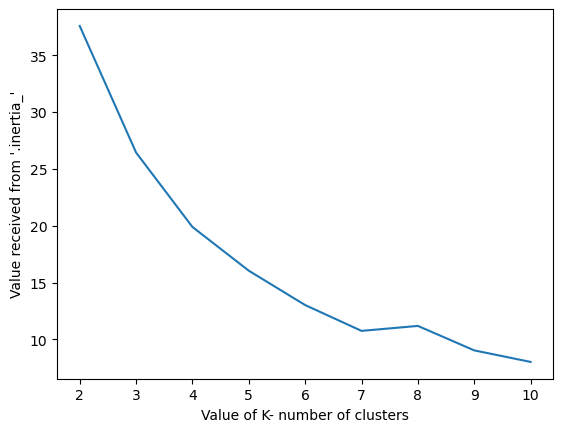

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 2 , the silhouette score is 43.41
For clusters = 2 , the davies bouldin score is 0.89
For clusters = 2 , the calinski harabasz score is 645.9

For clusters = 3 , the silhouette score is 37.46
For clusters = 3 , the davies bouldin score is 0.99
For clusters = 3 , the calinski harabasz score is 615.76

For clusters = 4 , the silhouette score is 39.13
For clusters = 4 , the davies bouldin score is 0.83
For clusters = 4 , the calinski harabasz score is 630.84



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 5 , the silhouette score is 37.5
For clusters = 5 , the davies bouldin score is 0.87
For clusters = 5 , the calinski harabasz score is 593.89

For clusters = 6 , the silhouette score is 38.49
For clusters = 6 , the davies bouldin score is 0.82
For clusters = 6 , the calinski harabasz score is 638.5

For clusters = 7 , the silhouette score is 38.55
For clusters = 7 , the davies bouldin score is 0.82
For clusters = 7 , the calinski harabasz score is 680.55

For clusters = 8 , the silhouette score is 36.5


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 8 , the davies bouldin score is 0.85
For clusters = 8 , the calinski harabasz score is 648.78

For clusters = 9 , the silhouette score is 35.12
For clusters = 9 , the davies bouldin score is 0.88
For clusters = 9 , the calinski harabasz score is 627.36

For clusters = 10 , the silhouette score is 33.41
For clusters = 10 , the davies bouldin score is 0.93
For clusters = 10 , the calinski harabasz score is 614.13



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.4376743204708131
0.3728989713804035


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.39138584153272876


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.37578390179439625


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.376552701743825
0.38543352987861484


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.36617436392355923


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.36031556689812716


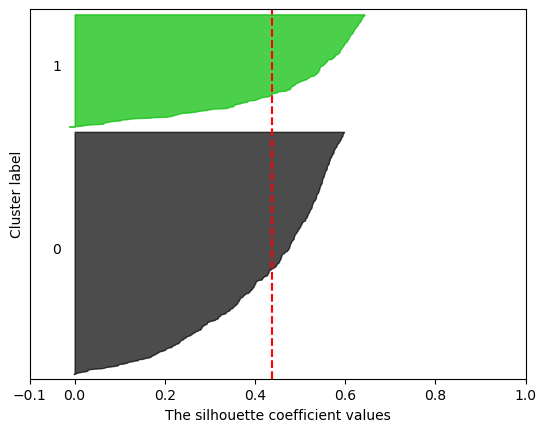

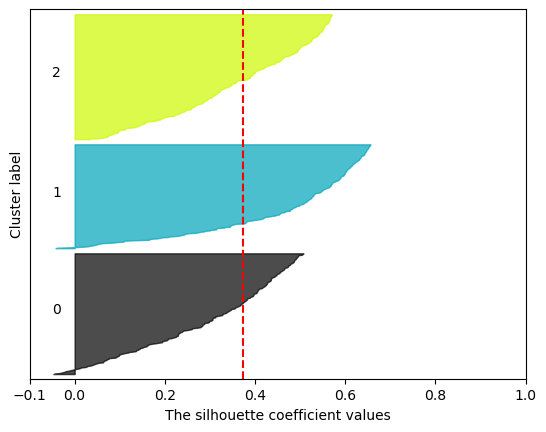

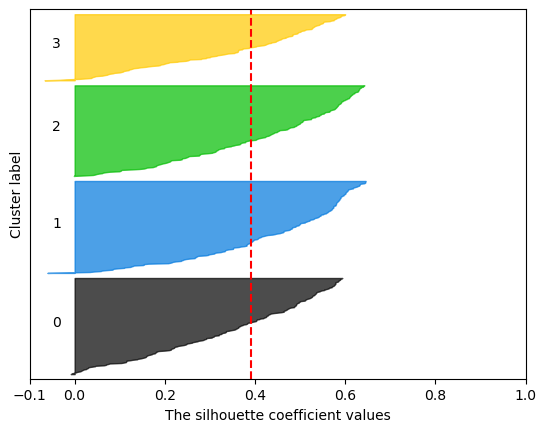

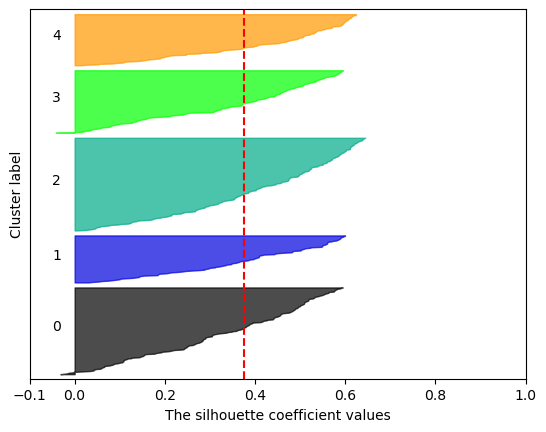

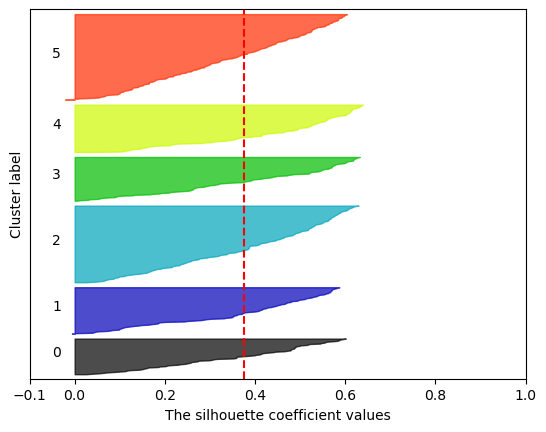

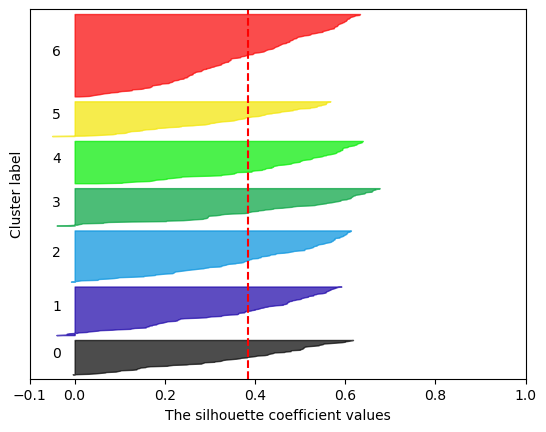

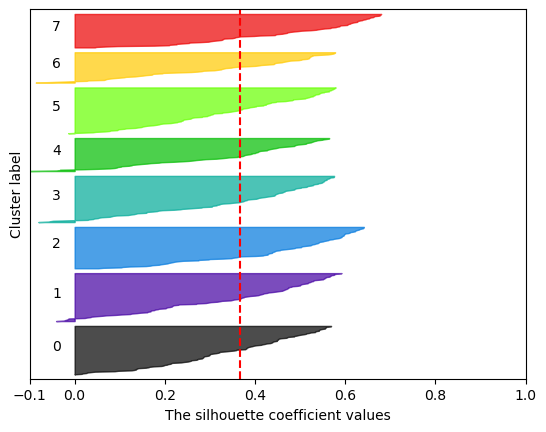

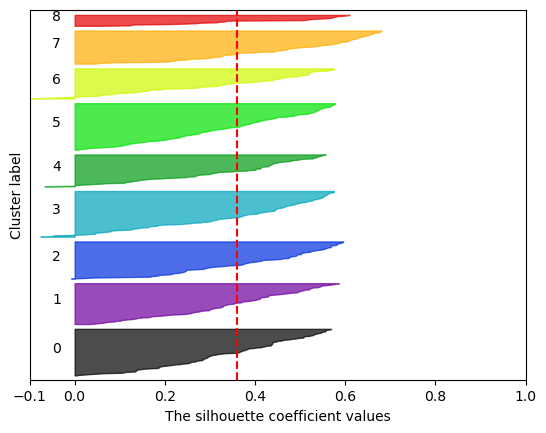

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


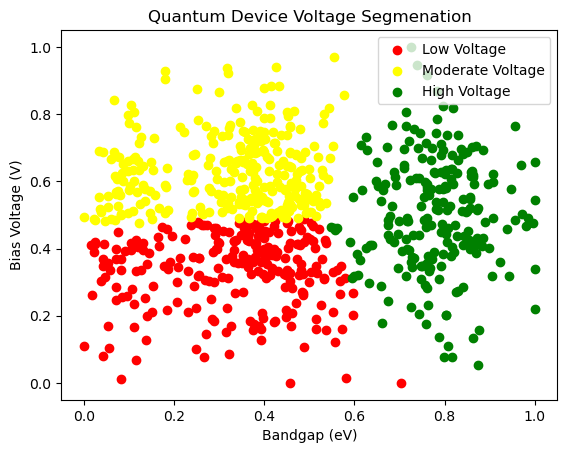

In [149]:
# Tasks 1-2 (Part 1): "bandgap_eV" vs. "bias_voltage_V" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["bandgap_eV", "bias_voltage_V"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["bandgap_eV", "bias_voltage_V"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Voltage", "Moderate Voltage", "High Voltage"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "bandgap_eV"],
                clustering_data.loc[clustering_data.cluster == i, "bias_voltage_V"],
                c=colors[i], label=segments[i])
plt.title("Quantum Device Voltage Segmenation")
plt.xlabel("Bandgap (eV)")
plt.ylabel("Bias Voltage (V)")
plt.legend()
plt.show()

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

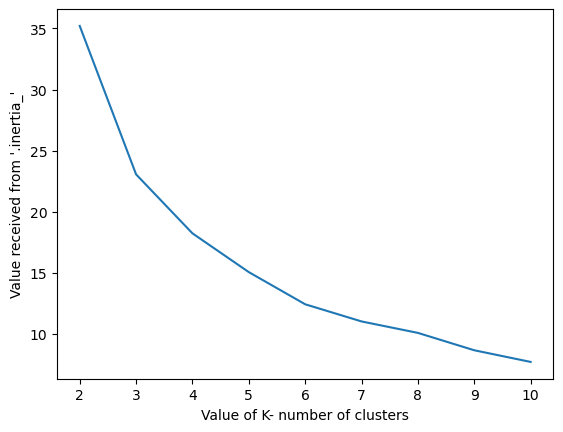

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 2 , the silhouette score is 31.71
For clusters = 2 , the davies bouldin score is 1.22
For clusters = 2 , the calinski harabasz score is 386.25

For clusters = 3 , the silhouette score is 33.71
For clusters = 3 , the davies bouldin score is 0.94
For clusters = 3 , the calinski harabasz score is 459.59

For clusters = 4 , the silhouette score is 32.57
For clusters = 4 , the davies bouldin score is 0.92
For clusters = 4 , the calinski harabasz score is 462.76

For clusters = 5 , the silhouette score is 31.1
For clusters = 5 , the davies bouldin score is 0.97
For clusters = 5 , the calinski harabasz score is 444.73

For clusters = 6 , the silhouette score is 32.52
For clusters = 6 , the davies bouldin score is 0.86
For clusters = 6 , the calinski harabasz score is 460.48



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 7 , the silhouette score is 31.55
For clusters = 7 , the davies bouldin score is 0.88
For clusters = 7 , the calinski harabasz score is 456.47

For clusters = 8 , the silhouette score is 30.95
For clusters = 8 , the davies bouldin score is 0.93
For clusters = 8 , the calinski harabasz score is 430.63

For clusters = 9 , the silhouette score is 30.8
For clusters = 9 , the davies bouldin score is 0.91
For clusters = 9 , the calinski harabasz score is 422.46

For clusters = 10 , the silhouette score is 32.22
For clusters = 10 , the davies bouldin score is 0.86
For clusters = 10 , the calinski harabasz score is 448.79



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.317538978144626
0.3325145460362053


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.32442189471607846
0.3127876766926208


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.3217011045470981
0.31673133071860554


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.3241102798842235
0.32084774503619995


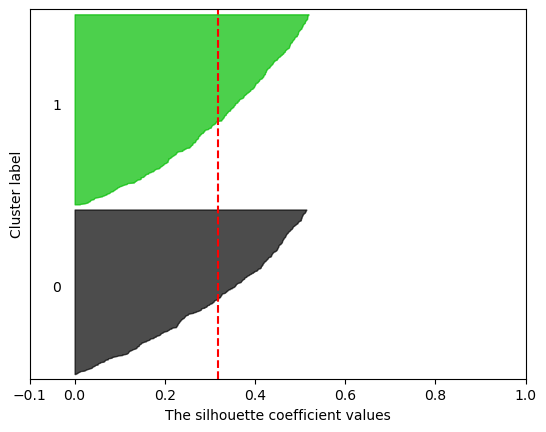

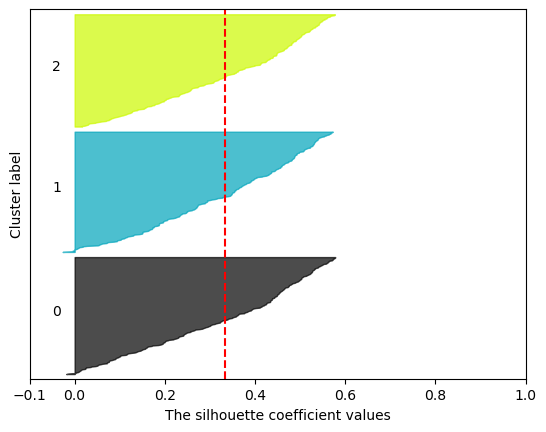

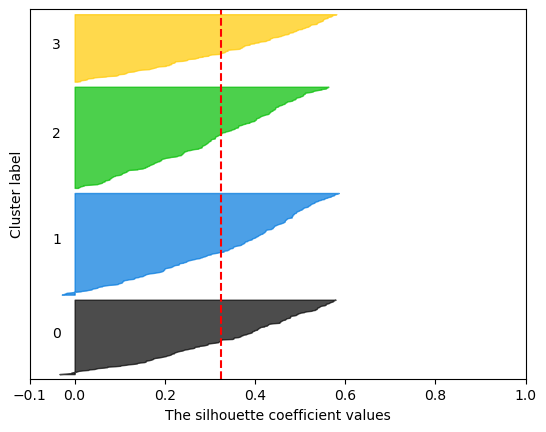

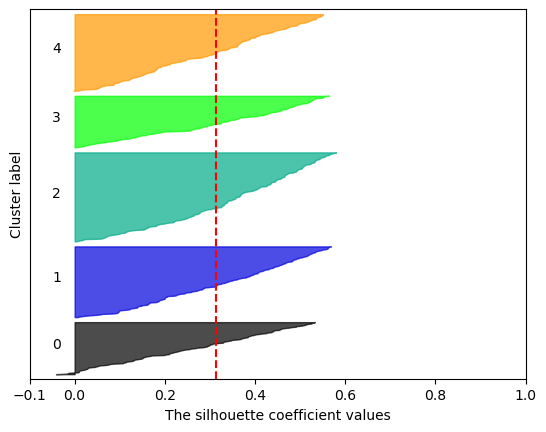

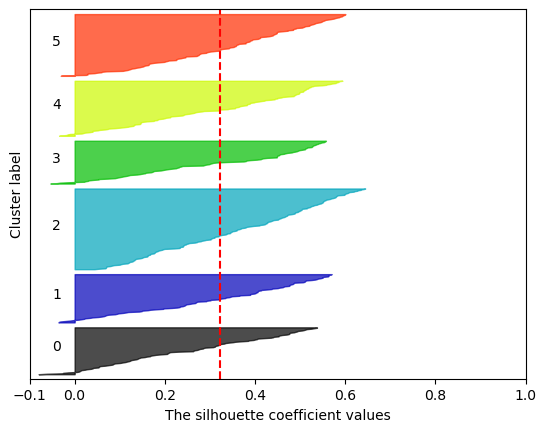

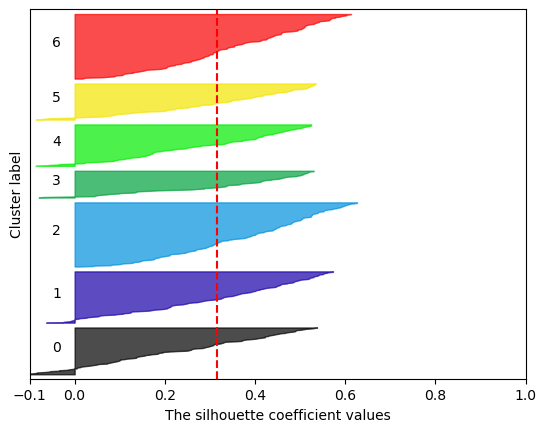

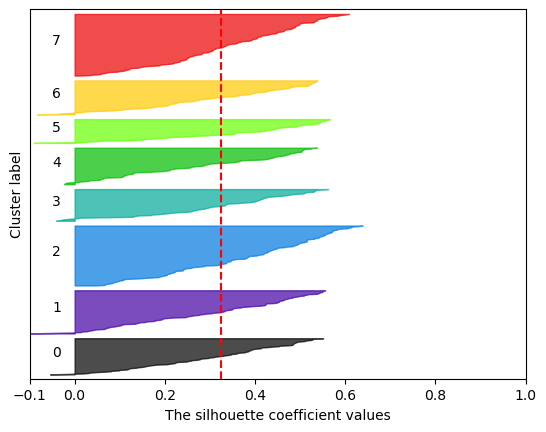

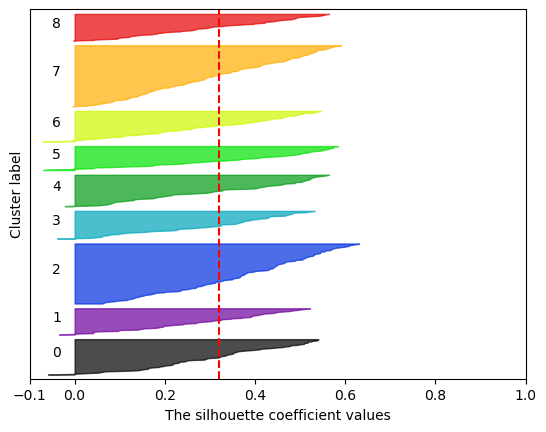

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


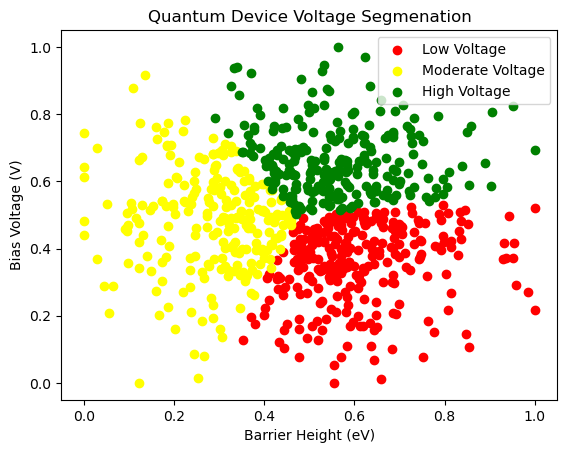

In [151]:
# Tasks 1-2 (Part 2): "barrier_height_eV" vs. "bias_voltage_V" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["barrier_height_eV", "bias_voltage_V"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["barrier_height_eV", "bias_voltage_V"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Voltage", "Moderate Voltage", "High Voltage"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "barrier_height_eV"],
                clustering_data.loc[clustering_data.cluster == i, "bias_voltage_V"],
                c=colors[i], label=segments[i])
plt.title("Quantum Device Voltage Segmenation")
plt.xlabel("Barrier Height (eV)")
plt.ylabel("Bias Voltage (V)")
plt.legend()
plt.show()

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

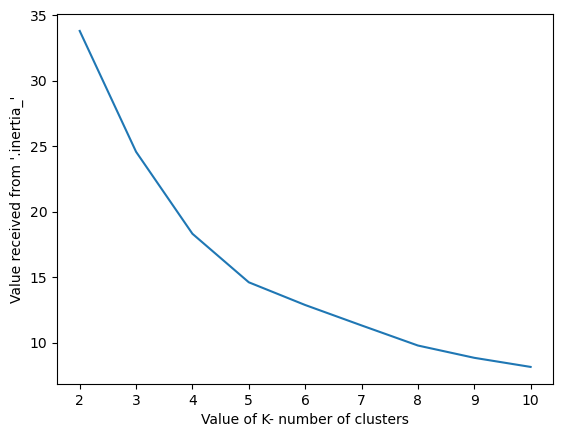

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 2 , the silhouette score is 40.36
For clusters = 2 , the davies bouldin score is 0.99
For clusters = 2 , the calinski harabasz score is 588.7

For clusters = 3 , the silhouette score is 35.31
For clusters = 3 , the davies bouldin score is 0.95
For clusters = 3 , the calinski harabasz score is 519.01

For clusters = 4 , the silhouette score is 34.58
For clusters = 4 , the davies bouldin score is 0.96
For clusters = 4 , the calinski harabasz score is 564.39

For clusters = 5 , the silhouette score is 35.73
For clusters = 5 , the davies bouldin score is 0.88
For clusters = 5 , the calinski harabasz score is 585.43



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 6 , the silhouette score is 33.53
For clusters = 6 , the davies bouldin score is 0.93
For clusters = 6 , the calinski harabasz score is 550.18

For clusters = 7 , the silhouette score is 32.97
For clusters = 7 , the davies bouldin score is 0.9
For clusters = 7 , the calinski harabasz score is 553.29

For clusters = 8 , the silhouette score is 35.18
For clusters = 8 , the davies bouldin score is 0.83
For clusters = 8 , the calinski harabasz score is 536.84

For clusters = 9 , the silhouette score is 34.47


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 9 , the davies bouldin score is 0.85
For clusters = 9 , the calinski harabasz score is 549.68

For clusters = 10 , the silhouette score is 33.39
For clusters = 10 , the davies bouldin score is 0.86
For clusters = 10 , the calinski harabasz score is 549.38



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.4034027733009675


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.37878618117627055


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.3485229558072741


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.36136904223935995
0.35955383322547413


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.3432800071229606
0.321042371435745


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.3466173197243758


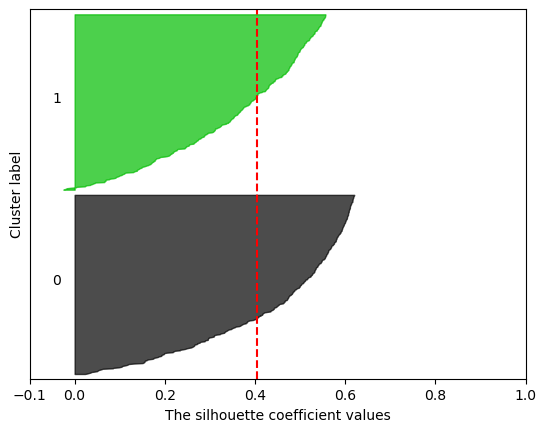

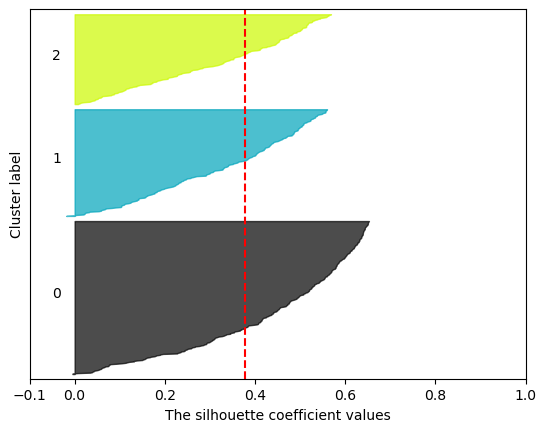

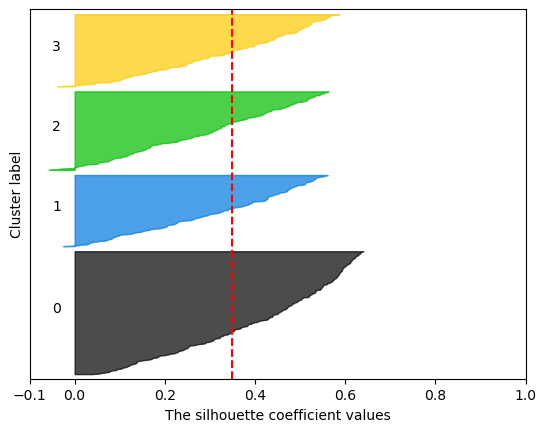

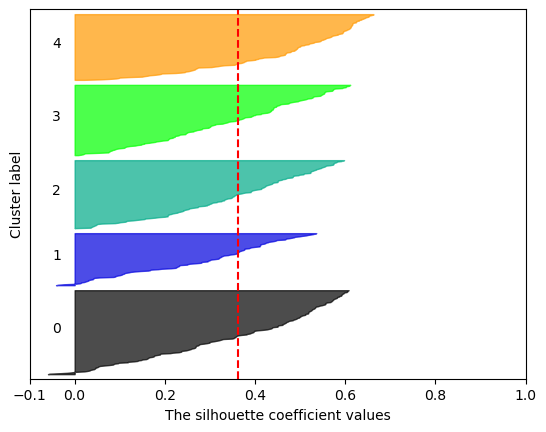

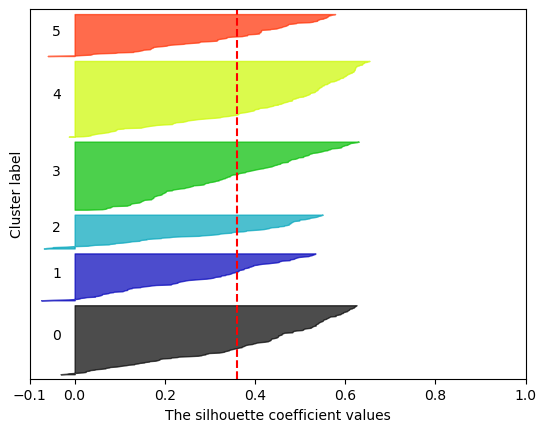

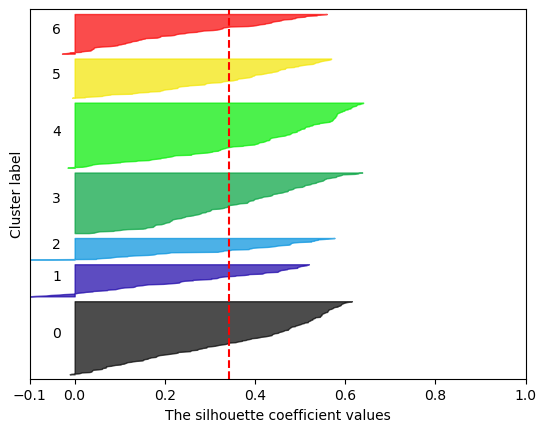

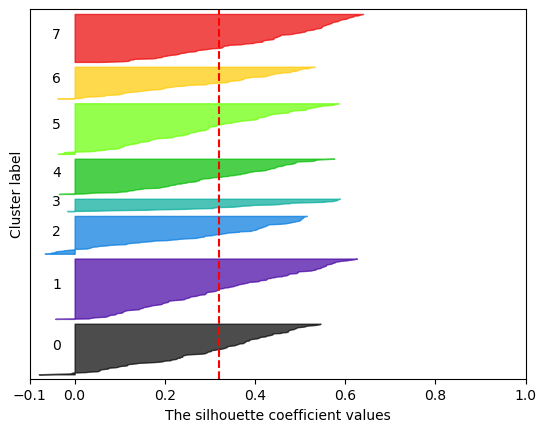

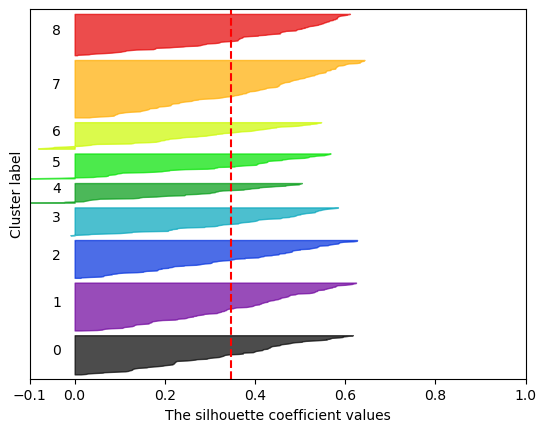

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


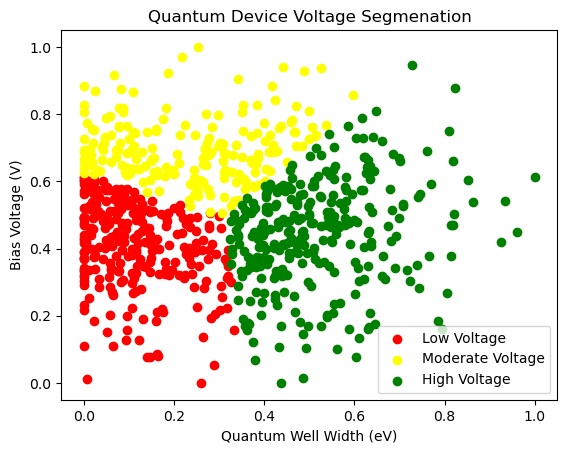

In [153]:
# Tasks 1-2 (Part 3): "quantum_well_width_nm" vs. "bias_voltage_V" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["quantum_well_width_nm", "bias_voltage_V"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["quantum_well_width_nm", "bias_voltage_V"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Voltage", "Moderate Voltage", "High Voltage"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "quantum_well_width_nm"],
                clustering_data.loc[clustering_data.cluster == i, "bias_voltage_V"],
                c=colors[i], label=segments[i])
plt.title("Quantum Device Voltage Segmenation")
plt.xlabel("Quantum Well Width (eV)")
plt.ylabel("Bias Voltage (V)")
plt.legend()
plt.show()

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

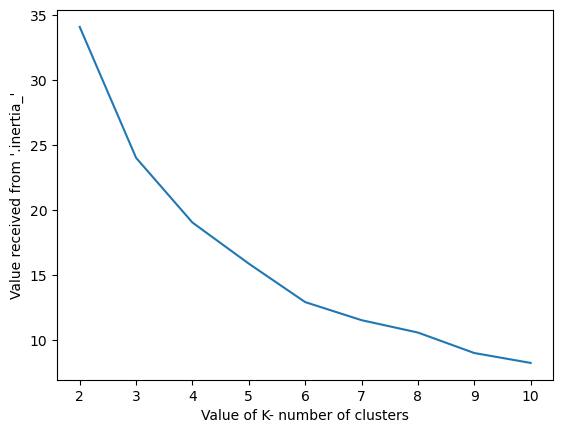

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 2 , the silhouette score is 32.9
For clusters = 2 , the davies bouldin score is 1.18
For clusters = 2 , the calinski harabasz score is 411.69

For clusters = 3 , the silhouette score is 32.94
For clusters = 3 , the davies bouldin score is 0.96
For clusters = 3 , the calinski harabasz score is 448.38

For clusters = 4 , the silhouette score is 31.07
For clusters = 4 , the davies bouldin score is 0.97
For clusters = 4 , the calinski harabasz score is 443.43

For clusters = 5 , the silhouette score is 30.24
For clusters = 5 , the davies bouldin score is 1.02
For clusters = 5 , the calinski harabasz score is 412.67

For clusters = 6 , the silhouette score is 32.8
For clusters = 6 , the davies bouldin score is 0.92
For clusters = 6 , the calinski harabasz score is 440.74

For clusters = 7 , the silhouette score is 32.56
For clusters = 7 , the davies bouldin score is 0.87
For clusters = 7 , the calinski harabasz score is 453.22

For clusters = 8 , the silhouette score is 31.3


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


For clusters = 9 , the calinski harabasz score is 450.11

For clusters = 10 , the silhouette score is 31.8
For clusters = 10 , the davies bouldin score is 0.87
For clusters = 10 , the calinski harabasz score is 441.98



C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.32901654257625934
0.3290324223862148


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.3208690254932956
0.31814795863803746


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.3208681432345631


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.3198645971480923
0.3195904917848501


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.33144159739262624


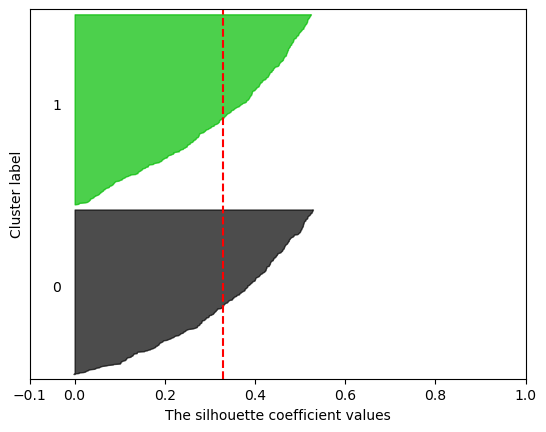

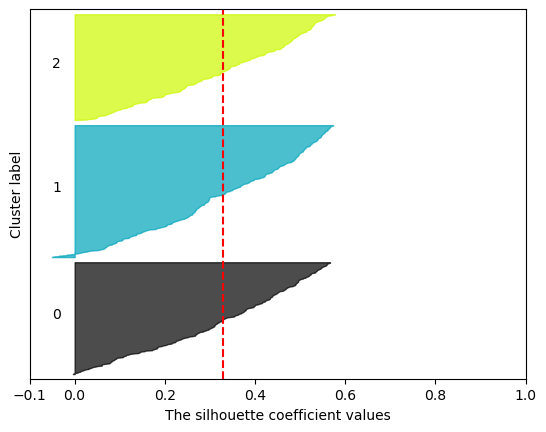

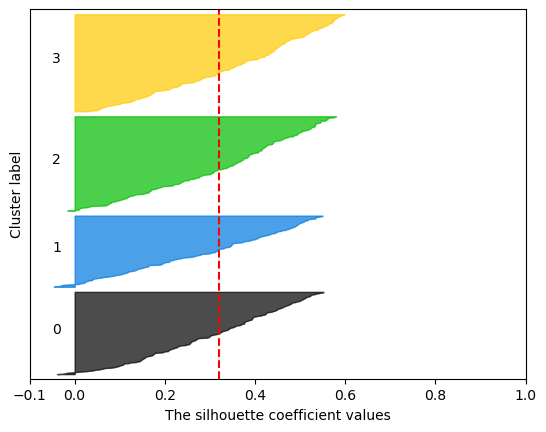

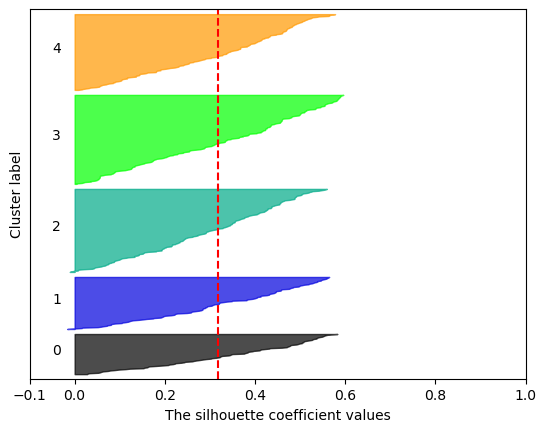

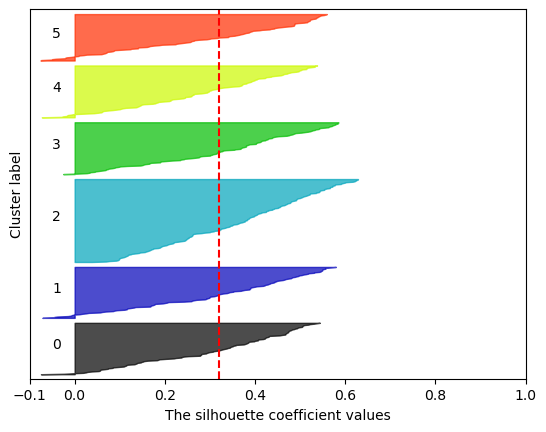

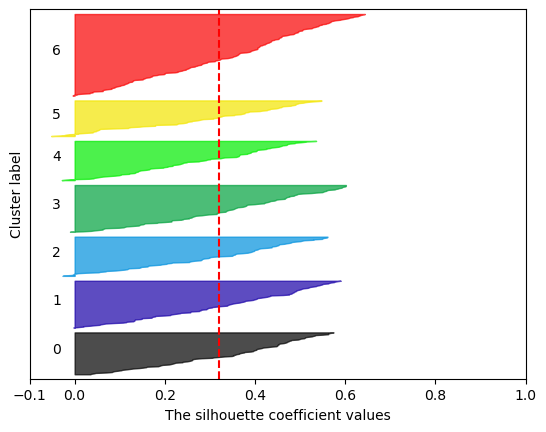

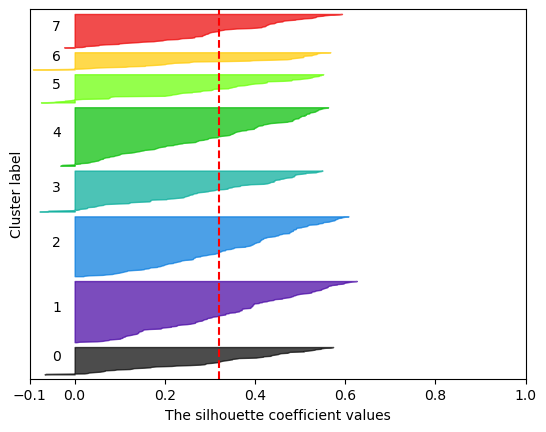

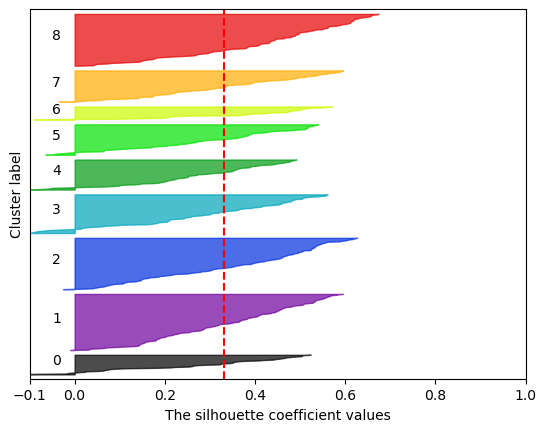

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


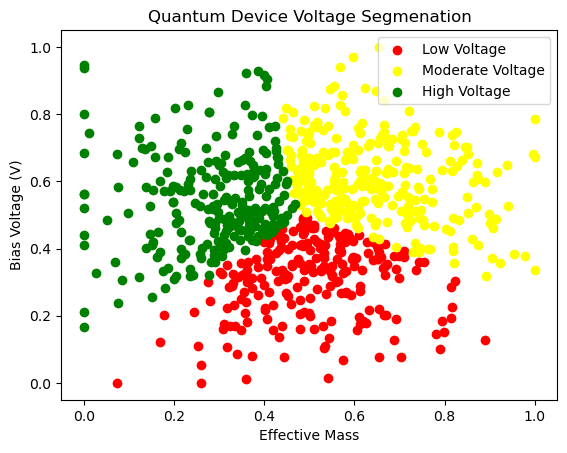

In [155]:
# Tasks 1-2 (Part 4): "effective_mass_me" vs. "bias_voltage_V" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["effective_mass_me", "bias_voltage_V"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["effective_mass_me", "bias_voltage_V"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Voltage", "Moderate Voltage", "High Voltage"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "effective_mass_me"],
                clustering_data.loc[clustering_data.cluster == i, "bias_voltage_V"],
                c=colors[i], label=segments[i])
plt.title("Quantum Device Voltage Segmenation")
plt.xlabel("Effective Mass")
plt.ylabel("Bias Voltage (V)")
plt.legend()
plt.show()

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

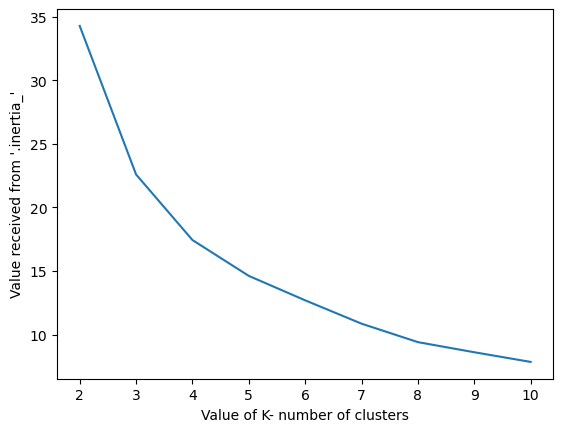

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 2 , the silhouette score is 31.54
For clusters = 2 , the davies bouldin score is 1.23
For clusters = 2 , the calinski harabasz score is 380.06

For clusters = 3 , the silhouette score is 32.03
For clusters = 3 , the davies bouldin score is 0.97
For clusters = 3 , the calinski harabasz score is 427.64

For clusters = 4 , the silhouette score is 32.82
For clusters = 4 , the davies bouldin score is 0.92
For clusters = 4 , the calinski harabasz score is 469.09

For clusters = 5 , the silhouette score is 30.29
For clusters = 5 , the davies bouldin score is 1.0
For clusters = 5 , the calinski harabasz score is 433.79

For clusters = 6 , the silhouette score is 30.26
For clusters = 6 , the davies bouldin score is 0.97
For clusters = 6 , the calinski harabasz score is 418.81

For clusters = 7 , the silhouette score is 31.86
For clusters = 7 , the davies bouldin score is 0.93
For clusters = 7 , the calinski harabasz score is 441.3

For clusters = 8 , the silhouette score is 30.43

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

For clusters = 9 , the silhouette score is 32.15
For clusters = 9 , the davies bouldin score is 0.86
For clusters = 9 , the calinski harabasz score is 454.2

For clusters = 10 , the silhouette score is 32.39
For clusters = 10 , the davies bouldin score is 0.85
For clusters = 10 , the calinski harabasz score is 445.8

0.31540062718131395


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\sit

0.33667312592895293
0.32678453064768415


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.32780038669771194
0.31561276255326787


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.3278937528308648
0.32916669135374166


C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.3245434161620386


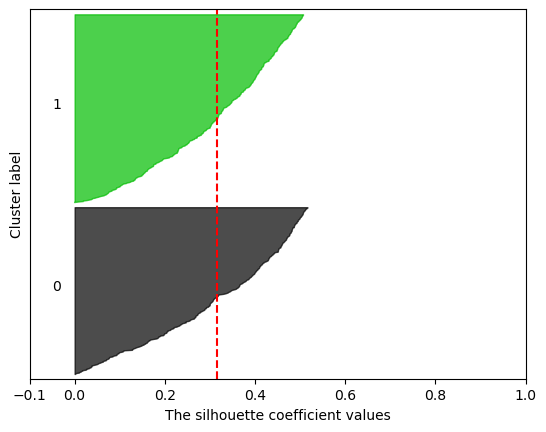

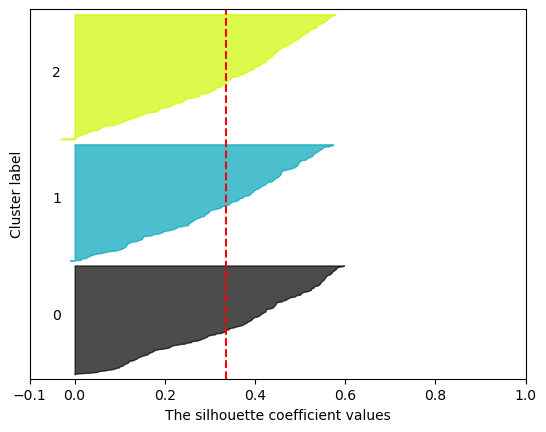

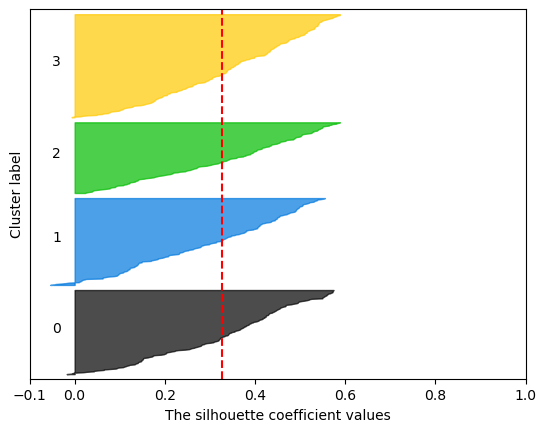

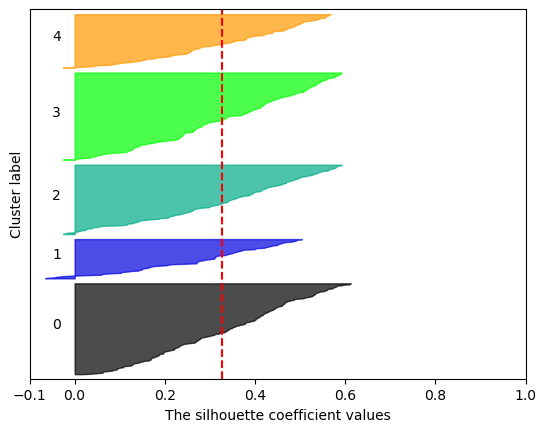

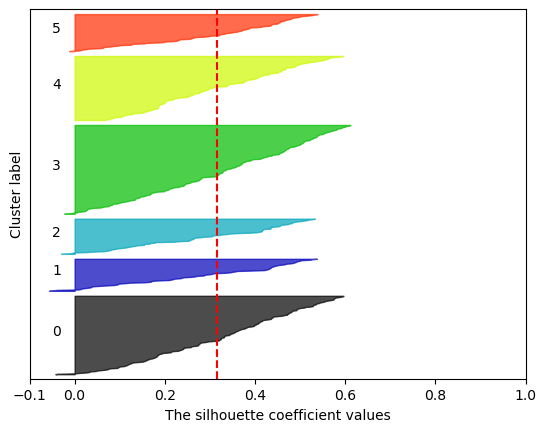

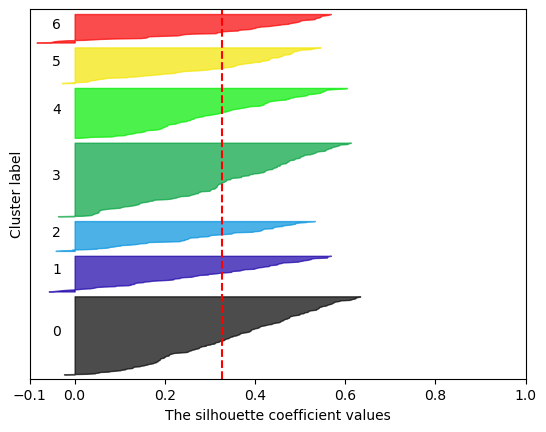

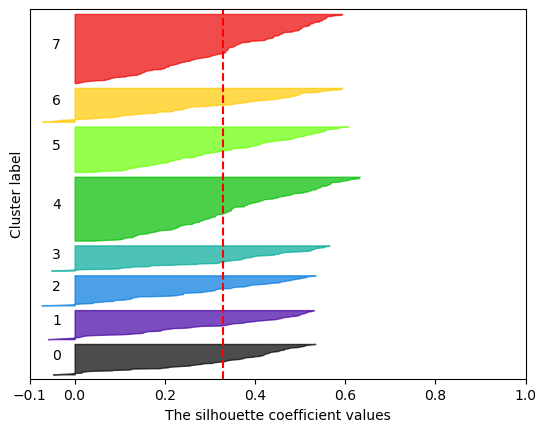

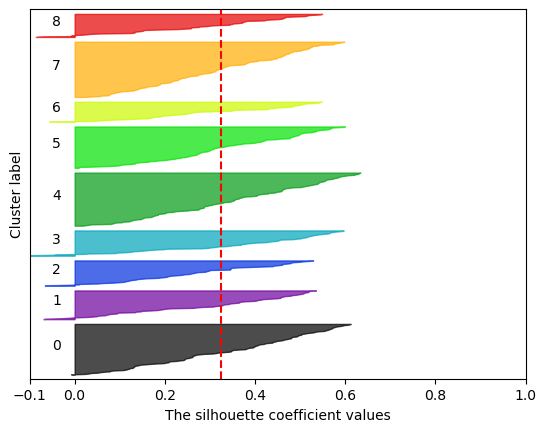

C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\rathi\.anaconda\Renaissa_anaconda3_python\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


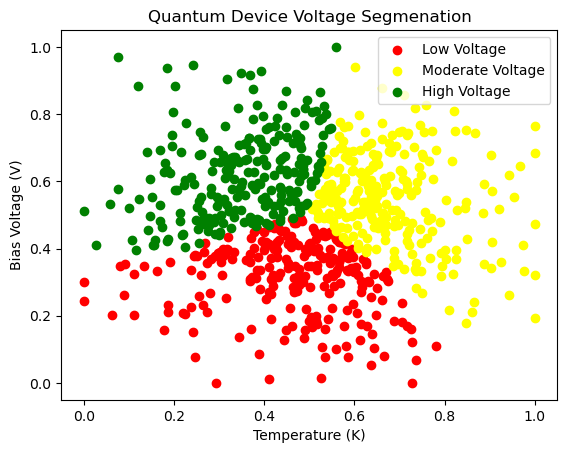

In [159]:
# Tasks 1-2 (Part 5): "temperature_K" vs. "bias_voltage_V" Data

# K-Means Clustering
from sklearn.cluster import KMeans

X = np.array(no_outlier[["temperature_K", "bias_voltage_V"]]).reshape(-1, 2)

err = []
my_cluster = np.arange(2, 11)
for k in my_cluster:
  temp = KMeans(n_clusters = k)
  temp.fit(X)
  err.append(temp.inertia_)  # '.inertia_' is provided to us in KMeans, it is the sum of squared distances of the samples.

# We will create an elbow curve to visualize data and find the most appropriate number of clusters.
plt.plot(my_cluster, err)
plt.xlabel("Value of K- number of clusters")
plt.ylabel("Value received from '.inertia_'")
plt.show()

# We will use other performance measures to see the appropriate number of clusters.
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

for j in my_cluster:
  temp_model = KMeans(n_clusters = j, random_state = 0)
  cluster_labels = temp_model.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels) * 100
  print("For clusters =", j,",","the silhouette score is", round(silhouette_avg, 2))
  print("For clusters =", j,",","the davies bouldin score is", round(davies_bouldin_score(X, temp_model.labels_), 2))
  print("For clusters =", j,",","the calinski harabasz score is", round(calinski_harabasz_score(X, temp_model.labels_), 2))
  print()

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical (v) line for average silhouette score of all the values
    sil_avg = silhouette_score(X, cluster_labels)
    print(sil_avg)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# Silhouette curve can help us find the suitable number of clusters.

# Let's finalize k=3, means that we need 3 groups.
# Apply KMeans
final_km = KMeans(n_clusters=3, random_state=0)
final_km.fit(X)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_  # our final model

# Select relevant features for clustering
clustering_features = ["temperature_K", "bias_voltage_V"]
clustering_data = no_outlier[clustering_features]

# Optional: scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(clustering_data)
clusters = final_km.fit_predict(X_scaled)

# Assign cluster labels
clustering_data = clustering_data.copy()
clustering_data['cluster'] = clusters

# Plot the clusters
segments = ["Low Voltage", "Moderate Voltage", "High Voltage"]
colors = ["red", "yellow", "green"]

for i in range(3):
    plt.scatter(clustering_data.loc[clustering_data.cluster == i, "temperature_K"],
                clustering_data.loc[clustering_data.cluster == i, "bias_voltage_V"],
                c=colors[i], label=segments[i])
plt.title("Quantum Device Voltage Segmenation")
plt.xlabel("Temperature (K)")
plt.ylabel("Bias Voltage (V)")
plt.legend()
plt.show()